In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt 

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

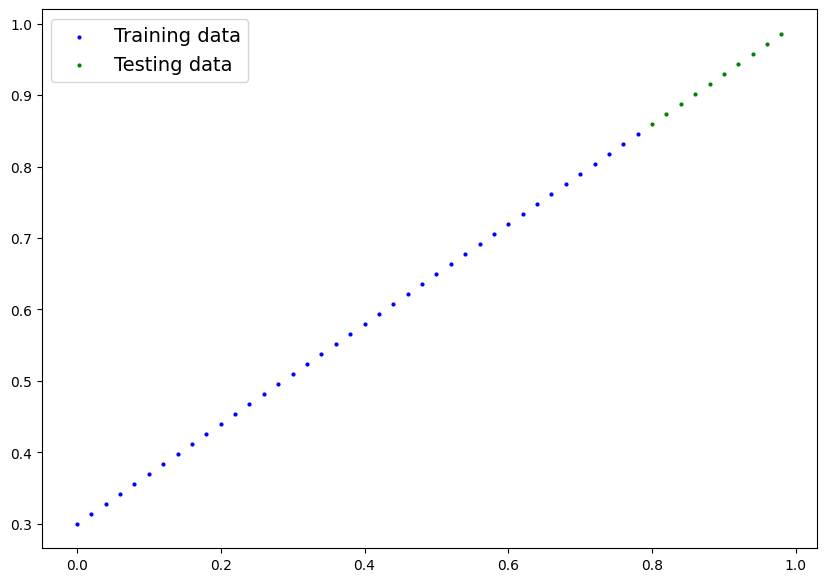

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions()

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input data
        return self.weight * x + self.bias # Linear Regression Formula

In [6]:
torch.manual_seed(42) # 아래 랜덤값 고정시키기 위해 

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
# Name of parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
# 추측하기 
with torch.inference_mode(): # ! Habit ! this context manager turns off gradient similar with no_grad()
    y_preds = model_0(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

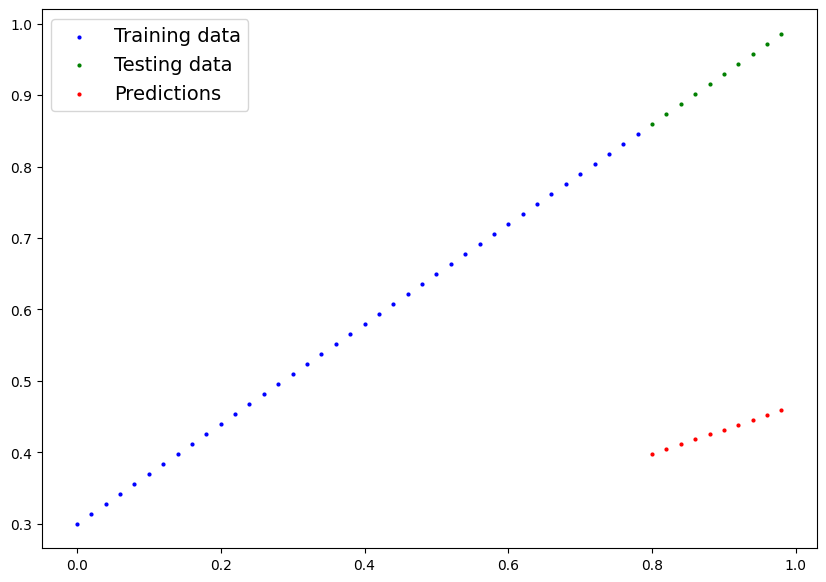

In [9]:
# predictions before the training *Terrible*
plot_predictions(predictions=y_preds)

# 손실 구하기

* **Loss function:** 예측값과 실제값의 차이를 구한다, Lower is better, a.k.a Cost function, Criterion
* **Optimizer:** 손실에 따라 가중치와 bias (parameters)를 조정한다

In [10]:
# MAE = torch.nn.L1Loss() not gonna use this
# 첫번째로 L1Loss와 SGD 를 사용했을 땐 더 이상 Loss가 내려가지 않았지만
# 두번째로 MSELoss, Adam을 사용한 결과 Loss가 완벽한 0.0 으로 내려갔다
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

In [11]:
torch.manual_seed(42)
epochs=10000

# 그래프 그리기용 
train_loss_values = []
test_loss_values = []
epoch_count = []

# Training
for epoch in range(epochs):
    model_0.train() # turn model into training mode (this is the default state of the model )

    # 1. Forward propagation
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = criterion(y_pred, y_train)
    
    # 3, Optimizer zero grad
    optimizer.zero_grad() # Refresh 
    
    # 4. Backpropagation 
    loss.backward()
    
    # 5. Gradient Descent
    optimizer.step() # 값을 계속 저장해두기 때문에 zero_grad로 저장을 끈다 그래서 한 사이클마다 계속 step 한다
    
    ### Testing
    model_0.eval() # 테스트 이외에 필요없는 세팅 끄기
    
    # 통계
    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = criterion(test_pred, y_test.type(torch.float))
        
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.10493002086877823 | Test loss: 0.2266416996717453
Epoch: 10 | Loss: 0.03497854620218277 | Test loss: 0.08532668650150299
Epoch: 20 | Loss: 0.005314734764397144 | Test loss: 0.018773499876260757
Epoch: 30 | Loss: 0.0010233278153464198 | Test loss: 0.0016791874077171087
Epoch: 40 | Loss: 0.0019537939224392176 | Test loss: 0.000175416047568433
Epoch: 50 | Loss: 0.0012090662494301796 | Test loss: 0.000711452157702297
Epoch: 60 | Loss: 0.0006284121191129088 | Test loss: 0.0022178818471729755
Epoch: 70 | Loss: 0.0005625509074889123 | Test loss: 0.002901036525145173
Epoch: 80 | Loss: 0.00046351831406354904 | Test loss: 0.002251278143376112
Epoch: 90 | Loss: 0.00036325902328826487 | Test loss: 0.001438833074644208
Epoch: 100 | Loss: 0.0002984470338560641 | Test loss: 0.0010244782315567136
Epoch: 110 | Loss: 0.00023944226268213242 | Test loss: 0.0008706009248271585
Epoch: 120 | Loss: 0.00018999181338585913 | Test loss: 0.0007575943600386381
Epoch: 130 | Loss: 0.00014962376735

OrderedDict([('weight', tensor([0.7000])), ('bias', tensor([0.3000]))])


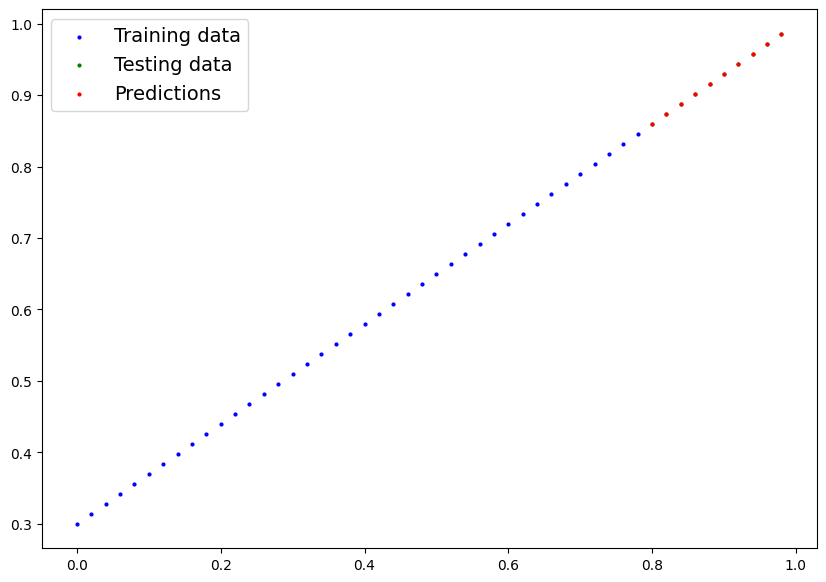

In [12]:
print(model_0.state_dict())
with torch.inference_mode():
    y_preds_new = model_0(X_test)

# Predictions after training the model, Amazing improvements
plot_predictions(predictions=y_preds_new)

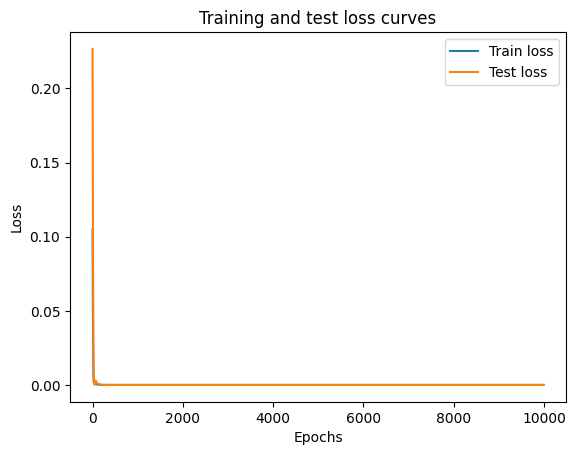

In [13]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [14]:
### 훈련된 모델 저장하기
from pathlib import Path

# 모델 폴더 만들기
path = Path("models")
path.mkdir(parents=True, exist_ok=True)

# 저장 경로
model_name = "regression_basics.pt" # ends with pt or pth
model_save_path = path / model_name

# model state dict 저장
torch.save(obj=model_0.state_dict(),
           f=model_save_path)

In [15]:
### 모델 불러오기
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=model_save_path))
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.7000])), ('bias', tensor([0.3000]))])